In [1]:
from sklearn.datasets import load_iris

In [2]:
i=load_iris()

In [3]:
dir(i)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
import pandas as pd

In [5]:
df=pd.DataFrame(i.data,columns=i.feature_names)

In [6]:
df['target']=i.target

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
main=df.drop(["sepal length (cm)","sepal width (cm)"],axis='columns')

In [9]:
main

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [10]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'target')

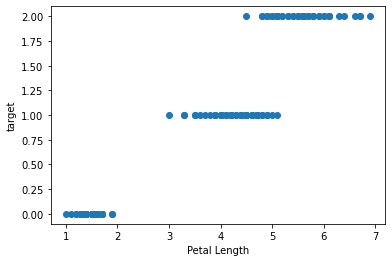

In [11]:
plt.scatter(main['petal length (cm)'],main['target'])
plt.xlabel("Petal Length")
plt.ylabel("target")

Text(0, 0.5, 'target')

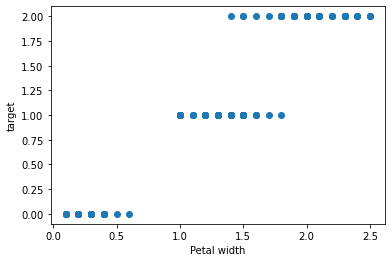

In [12]:
plt.scatter(main['petal width (cm)'],main['target'])
plt.xlabel("Petal width")
plt.ylabel("target")

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans=KMeans(n_clusters=3)

In [15]:
y_pred1=kmeans.fit_predict(main[['petal length (cm)','target']])

In [16]:
main['clusters1']=y_pred1

In [17]:
main

,petal length (cm),petal width (cm),target,clusters1
0,1.4,0.2,0,1
1,1.4,0.2,0,1
2,1.3,0.2,0,1
3,1.5,0.2,0,1
4,1.4,0.2,0,1
...,...,...,...,...
145,5.2,2.3,2,2
146,5.0,1.9,2,2
147,5.2,2.0,2,2
148,5.4,2.3,2,2


In [18]:
main1=main[main.clusters1==0]
main2=main[main.clusters1==1]
main3=main[main.clusters1==2]

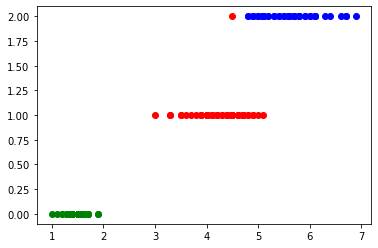

In [19]:
#petal length (cm) and Target
plt.scatter(main1['petal length (cm)'],main1['target'],color='red')
plt.scatter(main2['petal length (cm)'],main2['target'],color='green')
plt.scatter(main3['petal length (cm)'],main3['target'],color='blue')

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
mms=MinMaxScaler()

In [22]:
main['petal length (cm)']=mms.fit_transform(main[['petal length (cm)']])
main['petal width (cm)']=mms.fit_transform(main[['petal width (cm)']])
main['target']=mms.fit_transform(main[['target']])

In [23]:
main

,petal length (cm),petal width (cm),target,clusters1
0,0.067797,0.041667,0.0,1
1,0.067797,0.041667,0.0,1
2,0.050847,0.041667,0.0,1
3,0.084746,0.041667,0.0,1
4,0.067797,0.041667,0.0,1
...,...,...,...,...
145,0.711864,0.916667,1.0,2
146,0.677966,0.750000,1.0,2
147,0.711864,0.791667,1.0,2
148,0.745763,0.916667,1.0,2


In [24]:
#AFTER MINMAXSCALING
kmeans=KMeans(n_clusters=3)

In [25]:
y_pred1=kmeans.fit_predict(main[['petal length (cm)','target']])
main['clusters1']=y_pred1

In [26]:
main1=main[main.clusters1==0]
main2=main[main.clusters1==1]
main3=main[main.clusters1==2]

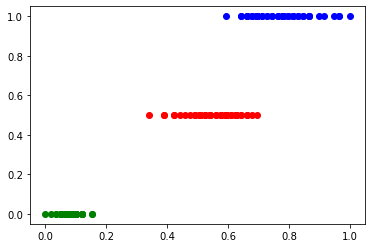

In [27]:
plt.scatter(main1['petal length (cm)'],main1['target'],color='red')
plt.scatter(main2['petal length (cm)'],main2['target'],color='green')
plt.scatter(main3['petal length (cm)'],main3['target'],color='blue')

In [28]:
y_pred2=kmeans.fit_predict(main[['petal width (cm)','target']])
main['clusters2']=y_pred2

In [29]:
main

,petal length (cm),petal width (cm),target,clusters1,clusters2
0,0.067797,0.041667,0.0,1,1
1,0.067797,0.041667,0.0,1,1
2,0.050847,0.041667,0.0,1,1
3,0.084746,0.041667,0.0,1,1
4,0.067797,0.041667,0.0,1,1
...,...,...,...,...,...
145,0.711864,0.916667,1.0,2,2
146,0.677966,0.750000,1.0,2,2
147,0.711864,0.791667,1.0,2,2
148,0.745763,0.916667,1.0,2,2


In [30]:
main1=main[main.clusters2==0]
main2=main[main.clusters2==1]
main3=main[main.clusters2==2]


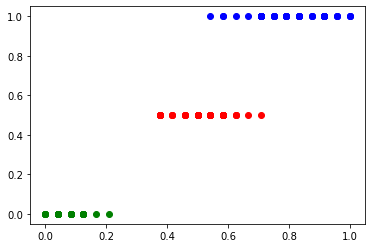

In [31]:
plt.scatter(main1['petal width (cm)'],main1['target'],color='red')
plt.scatter(main2['petal width (cm)'],main2['target'],color='green')
plt.scatter(main3['petal width (cm)'],main3['target'],color='blue')

In [32]:
#Choosing Optimal K for Petal Width---Elbow method
k_rng=range(2,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(main[['petal length (cm)','target']])
    sse.append(km.inertia_)

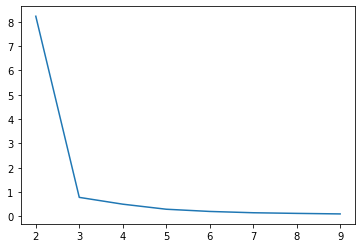

In [33]:
plt.plot(k_rng,sse)

In [34]:
#Choosing Optimal K for Petal Width---Elbow method
k_rng=range(2,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(main[['petal width (cm)','target']])
    sse.append(km.inertia_)

In [35]:
sse

[9.445590277777786,
 1.0688541666666675,
 0.6143788021112903,
 0.3969536578111461,
 0.31360737982061515,
 0.23499021309912832,
 0.1681194475164728,
 0.11501541944691168]

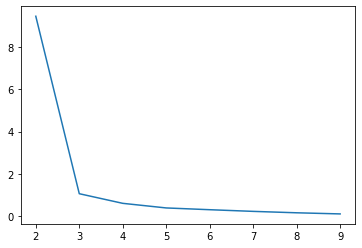

In [36]:
plt.plot(k_rng,sse)